<a href="https://colab.research.google.com/github/mateusvillarroel/PythonXCohen/blob/main/Projects/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import urllib.request
import re
import matplotlib.pyplot as plt
import numpy as np
import string
import math

Downloading text and formatting


In [13]:
url = "https://www.gutenberg.org/files/35/35-0.txt"
response = urllib.request.urlopen(url)
text = response.read()
text_clean = text.decode("utf-8")
print(text_clean)

*** START OF THE PROJECT GUTENBERG EBOOK 35 ***




The Time Machine

An Invention

by H. G. Wells


CONTENTS

 I Introduction
 II The Machine
 III The Time Traveller Returns
 IV Time Travelling
 V In the Golden Age
 VI The Sunset of Mankind
 VII A Sudden Shock
 VIII Explanation
 IX The Morlocks
 X When Night Came
 XI The Palace of Green Porcelain
 XII In the Darkness
 XIII The Trap of the White Sphinx
 XIV The Further Vision
 XV The Time Traveller’s Return
 XVI After the Story
 Epilogue




 I.
 Introduction


The Time Traveller (for so it will be convenient to speak of him) was
expounding a recondite matter to us. His pale grey eyes shone and
twinkled, and his usually pale face was flushed and animated. The fire
burnt brightly, and the soft radiance of the incandescent lights in the
lilies of silver caught the bubbles that flashed and passed in our
glasses. Our chairs, being his patents, embraced and caressed us rather
than submitted to be sat upon, and there was that luxurious
after

Spliting text in words and checking word length frequency

In [54]:
text_clean_words = text_clean.split()
index= {}

for word in text_clean_words:
  length = len(word)
  index.setdefault(length,[]).append(word)

index

{3: ['***',
  'THE',
  '***',
  'The',
  'The',
  'III',
  'The',
  'the',
  'Age',
  'The',
  'VII',
  'The',
  'The',
  'XII',
  'the',
  'The',
  'the',
  'XIV',
  'The',
  'The',
  'XVI',
  'the',
  'The',
  'was',
  'us.',
  'His',
  'and',
  'and',
  'his',
  'was',
  'and',
  'The',
  'and',
  'the',
  'the',
  'the',
  'the',
  'and',
  'our',
  'Our',
  'his',
  'and',
  'sat',
  'and',
  'was',
  'the',
  'And',
  'put',
  'the',
  'sat',
  'and',
  'his',
  'new',
  '(as',
  'it)',
  'and',
  'his',
  'one',
  'two',
  'are',
  'The',
  'for',
  'you',
  '“Is',
  'not',
  'red',
  'not',
  'ask',
  'you',
  'for',
  'it.',
  'You',
  'You',
  'has',
  'you',
  'has',
  'are',
  'all',
  'the',
  'and',
  'can',
  '“Of',
  'may',
  'All',
  '“So',
  'But',
  'Can',
  'not',
  'for',
  'any',
  'the',
  'But',
  'the',
  'you',
  'are',
  'the',
  'and',
  'is,',
  'the',
  'and',
  'the',
  'our',
  'one',
  'the',
  'the',
  'the',
  'end',
  'our',
  'his',
  'the',
  'the'

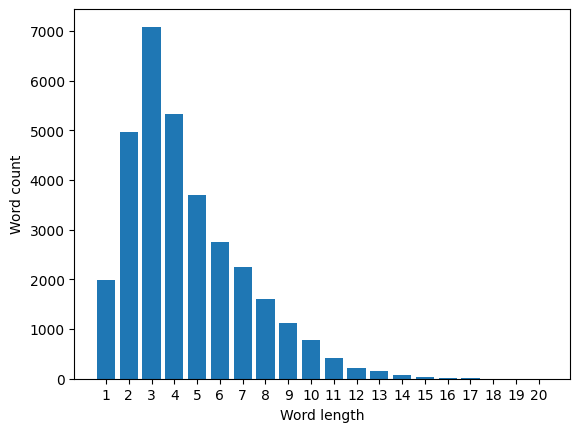

In [72]:
sorted_items = sorted(index.items())
lengths = [item[0] for item in sorted_items]
counts = [len(item[1]) for item in sorted_items]

plt.bar(range(len(lengths)),counts,tick_label=lengths)
plt.xlabel('Word length')
plt.ylabel('Word count')
plt.show()

Letter frequency

In [84]:
11100/len(text_clean)

0.06066468823269007

[Text(0, 0, 'a'),
 Text(1, 0, 'b'),
 Text(2, 0, 'c'),
 Text(3, 0, 'd'),
 Text(4, 0, 'e'),
 Text(5, 0, 'f'),
 Text(6, 0, 'g'),
 Text(7, 0, 'h'),
 Text(8, 0, 'i'),
 Text(9, 0, 'j'),
 Text(10, 0, 'k'),
 Text(11, 0, 'l'),
 Text(12, 0, 'm'),
 Text(13, 0, 'n'),
 Text(14, 0, 'o'),
 Text(15, 0, 'p'),
 Text(16, 0, 'q'),
 Text(17, 0, 'r'),
 Text(18, 0, 's'),
 Text(19, 0, 't'),
 Text(20, 0, 'u'),
 Text(21, 0, 'v'),
 Text(22, 0, 'w'),
 Text(23, 0, 'x'),
 Text(24, 0, 'y'),
 Text(25, 0, 'z')]

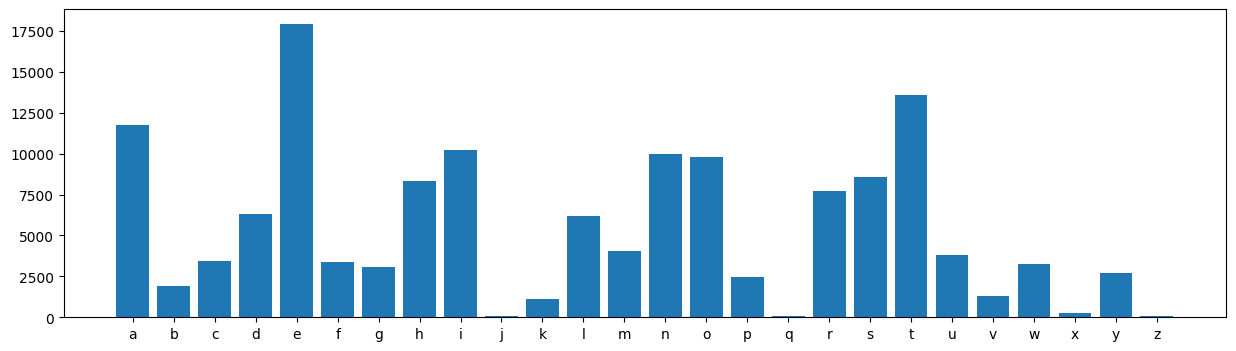

In [101]:
letters = string.ascii_lowercase

lettercounts = np.zeros(len(letters))
n=0

for i in letters:
  lettercounts[n] = text_clean.lower().count(i)
  n += 1

fig,ax=plt.subplots(1,figsize=(15,4))
ax.bar(range(len(letters)),lettercounts)
ax.set_xticks(range(len(letters)))
ax.set_xticklabels(letters)

Letter entropy

3.505867217530072


[Text(0, 0, 'a'),
 Text(1, 0, 'b'),
 Text(2, 0, 'c'),
 Text(3, 0, 'd'),
 Text(4, 0, 'e'),
 Text(5, 0, 'f'),
 Text(6, 0, 'g'),
 Text(7, 0, 'h'),
 Text(8, 0, 'i'),
 Text(9, 0, 'j'),
 Text(10, 0, 'k'),
 Text(11, 0, 'l'),
 Text(12, 0, 'm'),
 Text(13, 0, 'n'),
 Text(14, 0, 'o'),
 Text(15, 0, 'p'),
 Text(16, 0, 'q'),
 Text(17, 0, 'r'),
 Text(18, 0, 's'),
 Text(19, 0, 't'),
 Text(20, 0, 'u'),
 Text(21, 0, 'v'),
 Text(22, 0, 'w'),
 Text(23, 0, 'x'),
 Text(24, 0, 'y'),
 Text(25, 0, 'z')]

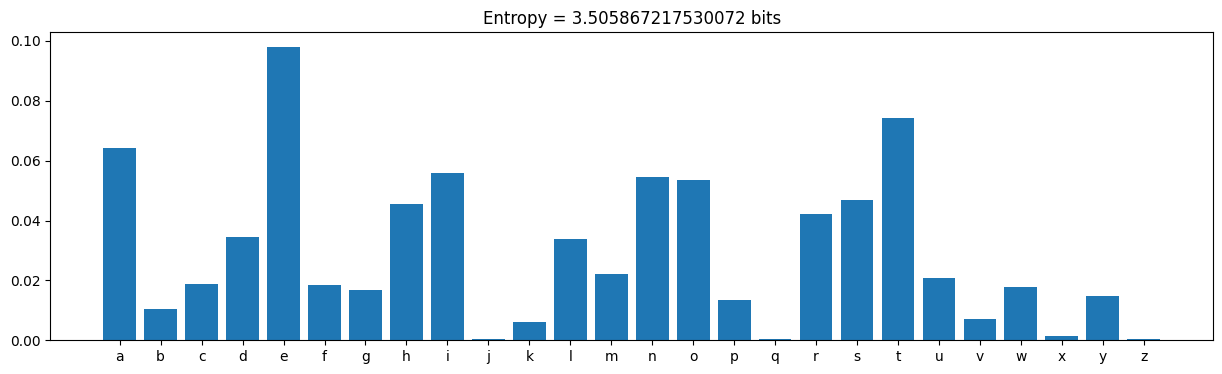

In [99]:
probs = lettercounts/len(text_clean)
entropies_all_each = []
entropy_total = np.sum(entropies_all_each)

for i in probs:
  entropies_all_each.append(-(i*math.log2(i)))

entropy_total = np.sum(entropies_all_each)
print(entropy_total)

fig,ax=plt.subplots(1,figsize=(15,4))
ax.bar(range(len(letters)),probs)
ax.set_title(f'Entropy = {entropy_total} bits')
ax.set_xticks(range(len(letters)))
ax.set_xticklabels(letters)


Conditional entropy


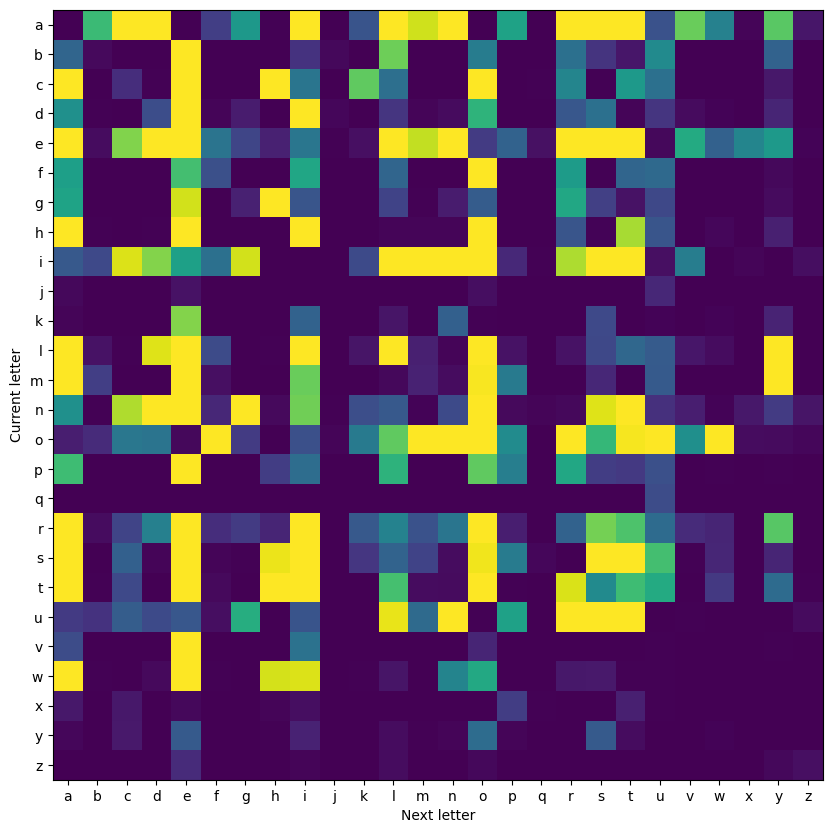

In [107]:
probmat = np.zeros((26,26))

for i in range(len(text_clean)-1):
  currlet=text_clean[i]
  nextlet=text_clean[i+1]
  if currlet in letters and nextlet in letters:
    probmat[letters.index(currlet),letters.index(nextlet)] +=1
# Probability exhibition
fig,ax = plt.subplots(1,figsize=(10,10))
ax.imshow(probmat,vmax=400)
ax.set_ylabel('Current letter')
ax.set_xlabel('Next letter')
ax.set_xticks(range(len(letters)))
ax.set_yticks(range(len(letters)))
ax.set_yticklabels(letters)
ax.set_xticklabels(letters)
plt.show()

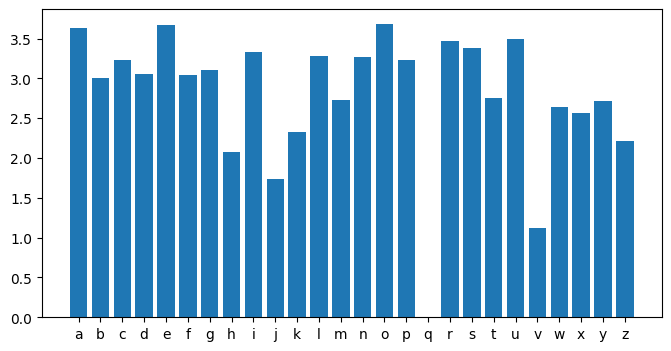

In [110]:
condentr = np.zeros(len(letters))

for i in range(len(letters)):
  probs = probmat[i,:]
  probs = probs/sum(probs)
  condentr[i] = -sum(probs*np.log2(probs+np.finfo(float).eps))

fig,ax = plt.subplots(1,figsize=(8,4))
ax.bar(range(len(letters)),condentr)
ax.set_xticks(range(len(letters)))
ax.set_xticklabels(letters)
plt.show()

Word cloud

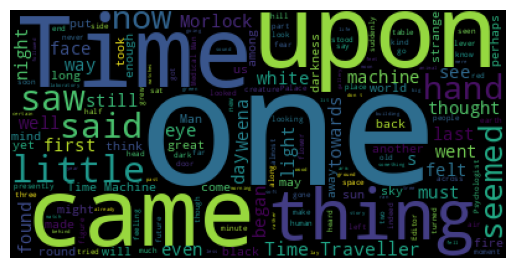

In [111]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(text_clean)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()